In [1]:
%matplotlib inline

from dpdqn_v1 import DPDQN1

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import gym
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
time_steps = 1e6 #testrun
#time_steps = 100000 #for prod or even more *10?100?
time_steps_test = int(time_steps/100)

from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines import results_plotter

os.makedirs("logs_test", exist_ok=True)
os.makedirs("logs_train", exist_ok=True)
os.makedirs("logs_tmp", exist_ok=True)
from shutil import copyfile
from utils import *

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



## DPDQN1

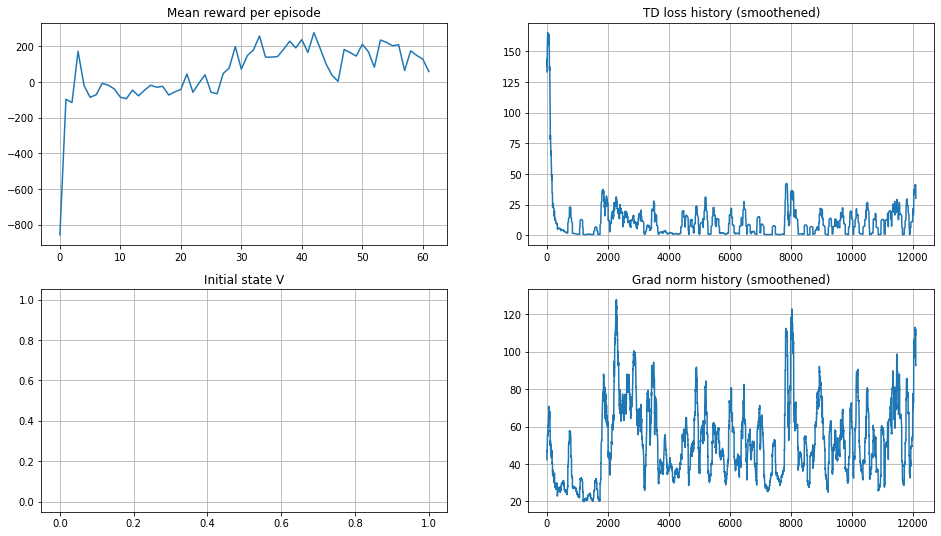

 62%|██████▏   | 614300/998001 [6:08:17<8:02:51, 13.24it/s]     

In [ ]:
%%time
envname="LunarLanderContinuous-v2"
env = gym.make(envname)
exp_name=env.spec._env_name+'-DPDQN1'

#train
log_dir='logs_train/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)

model = DPDQN1(env, verbose=1)

print("time_steps_todo: "+str(time_steps))
model.learn(total_timesteps=int(time_steps))

os.makedirs("models", exist_ok=True)
model.save("models/"+log_dir.split("/")[1])

copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()



In [ ]:
%%time
#test

env = gym.make(envname)
log_dir='logs_test/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)

#model = DPDQN1.load("models/"+log_dir.split("/")[1])
obs = env.reset()
for i in range(time_steps_test):
    if env.needs_reset:
        obs = env.reset()
    action, _states = model.predict(obs, greedy=True)
    obs, rewards, dones, info = env.step(action)
    #env.render()
    
copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()
